In [4]:

from functions.load_data import load_CIFAR_data, load_MNIST_data
from custom_layers.tropical_layers import TropEmbedMaxMin, TropConv2D, TropConv2DMax, TropEmbedMaxMinLogits
from custom_layers.initializers import BimodalNormalInitializer
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, MaxPooling2D, MaxPooling1D, AveragePooling1D, Activation, Flatten, Conv2D, Dropout, Input, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
import time



def trop_conv3layer_logits(num_epochs = 10,
                       batch_size = 64, 
                       verbose = 1,
                       training_loss = 'categorical_crossentropy',
                       num_first_filters = 32,
                       window_first_conv = (3,3),
                       initializer_w = initializers.RandomNormal(0, 0.05)):
    start_time = time.time()
    model = Sequential([Conv2D(num_first_filters, window_first_conv, activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        MaxPooling2D((2, 2)),                            
                        Conv2D(64, (3, 3), activation='relu'),
                        Flatten(),
                        Dense(64, activation='relu'),
                        TropEmbedMaxMinLogits(10, initializer_w=initializer_w)])
    #model.compile(optimizer='adam', loss=training_loss, metrics=['accuracy'])
    #model.fit(x_train, y_train, epochs=num_epochs,batch_size=batch_size, verbose=verbose)
    model.build(input_shape=(64, 32,32,3))
    model.summary()

trop_conv3layer_logits()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (64, 30, 30, 32)          896       
                                                                 
 max_pooling2d_6 (MaxPooling  (64, 15, 15, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (64, 13, 13, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (64, 6, 6, 64)           0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (64, 4, 4, 64)            36928     
                                                                 
 flatten_3 (Flatten)         (64, 1024)               

In [6]:
from custom_layers.tropical_layers import TropEmbedMaxMinLogits
from custom_layers.initializers import BimodalNormalInitializer
from functions.load_data import load_MNIST_data
from functions.attacks import attackTestSetBatch
from tensorflow.keras import Sequential, losses
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# -- load MNIST data -- 
x_train, x_test, y_train, y_test = load_MNIST_data(desired_classes=[i for i in range(10)])

In [3]:
model = Sequential([TropEmbedMaxMinLogits(10, initializer_w=BimodalNormalInitializer(0.5, 5, -5, 0))])
model.compile(optimizer=Adam(0.05),loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 [==============================] - 8s 5ms/step - loss: 1.8492 - accuracy: 0.4760
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8390 - accuracy: 0.4757
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8378 - accuracy: 0.4770
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8385 - accuracy: 0.4782
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 1.8389 - accuracy: 0.4739
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8372 - accuracy: 0.4783
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8375 - accuracy: 0.4797
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8393 - accuracy: 0.4750
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8385 - accuracy: 0.4783
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8386 - accuracy: 0.4777

In [4]:
relu_model = Sequential([Dense(10, activation='softmax')])
relu_model.compile(optimizer=Adam(0.05),loss='categorical_crossentropy', metrics=['accuracy'])
relu_model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 1.1082 - accuracy: 0.8347
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2104 - accuracy: 0.8619
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.3081 - accuracy: 0.8660
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2481 - accuracy: 0.8762
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2270 - accuracy: 0.8763
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2637 - accuracy: 0.8759
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 1.2706 - accuracy: 0.8759
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 1.2461 - accuracy: 0.8801
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 1.2254 - accuracy: 0.8836
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 1.2513 - accuracy: 0.8809

In [7]:
trop_x_test_att = attackTestSetBatch(model, x_test, y_test,  epsilon=0.1, loss_object=losses.CategoricalCrossentropy(),modelName='Tropical', num_steps=20)
relu_x_test_att = attackTestSetBatch(relu_model, x_test, y_test,  epsilon=0.1, loss_object=losses.CategoricalCrossentropy(),modelName='ReLU', num_steps=20)


Tropical model 0% attacked.
Tropical model 8% attacked.
Tropical model 16% attacked.
Tropical model 24% attacked.
Tropical model 32% attacked.
Tropical model 40% attacked.
Tropical model 48% attacked.
Tropical model 56% attacked.
Tropical model 64% attacked.
Tropical model 72% attacked.
Tropical model 80% attacked.
Tropical model 88% attacked.
Tropical model 96% attacked.
Tropical attack complete. Elapsed time: 254.04 seconds | 4.23 minutes.
ReLU model 0% attacked.
ReLU model 8% attacked.
ReLU model 16% attacked.
ReLU model 24% attacked.
ReLU model 32% attacked.
ReLU model 40% attacked.
ReLU model 48% attacked.
ReLU model 56% attacked.
ReLU model 64% attacked.
ReLU model 72% attacked.
ReLU model 80% attacked.
ReLU model 88% attacked.
ReLU model 96% attacked.
ReLU attack complete. Elapsed time: 163.89 seconds | 2.73 minutes.


In [8]:
model.evaluate(x_test, y_test)
model.evaluate(trop_x_test_att, y_test)

relu_model.evaluate(x_test, y_test)
relu_model.evaluate(relu_x_test_att, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 37.9148 - accuracy: 0.0309


[37.91481018066406, 0.030899999663233757]

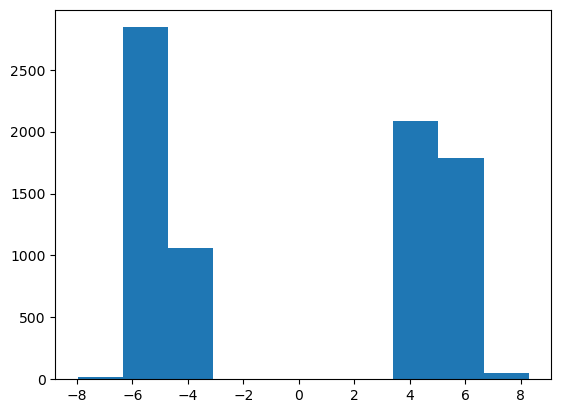

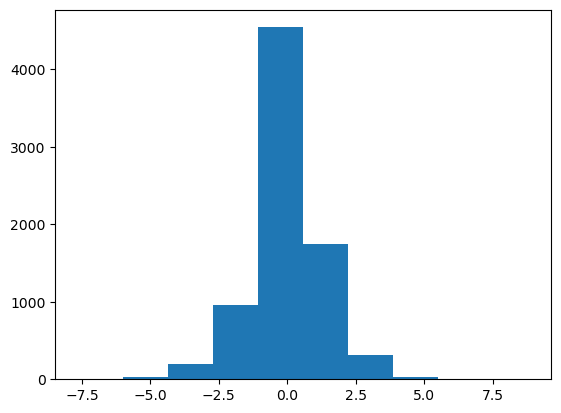

In [5]:
import matplotlib.pyplot as plt

plt.hist(model.get_weights()[0].flatten())
plt.show()

plt.hist(relu_model.get_weights()[0].flatten())
plt.show()